# Adv Stats Project: Predicting Stress Level

In [ ]:
# 1. IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [ ]:
# 2. LOAD DATA
df = pd.read_csv('Dataset.csv')  # Update the path in Colab

In [ ]:
# 3. DATA PREPROCESSING

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Check nulls
print(df.isnull().sum())

# Features and Target
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


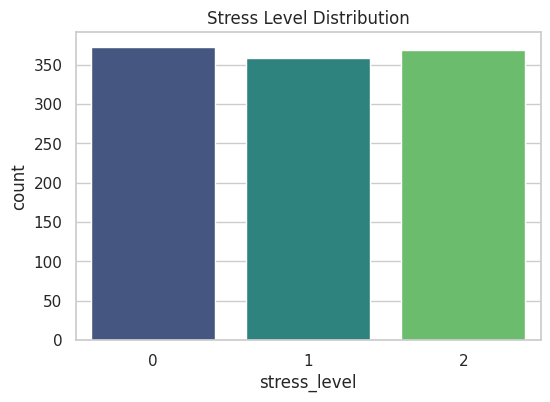

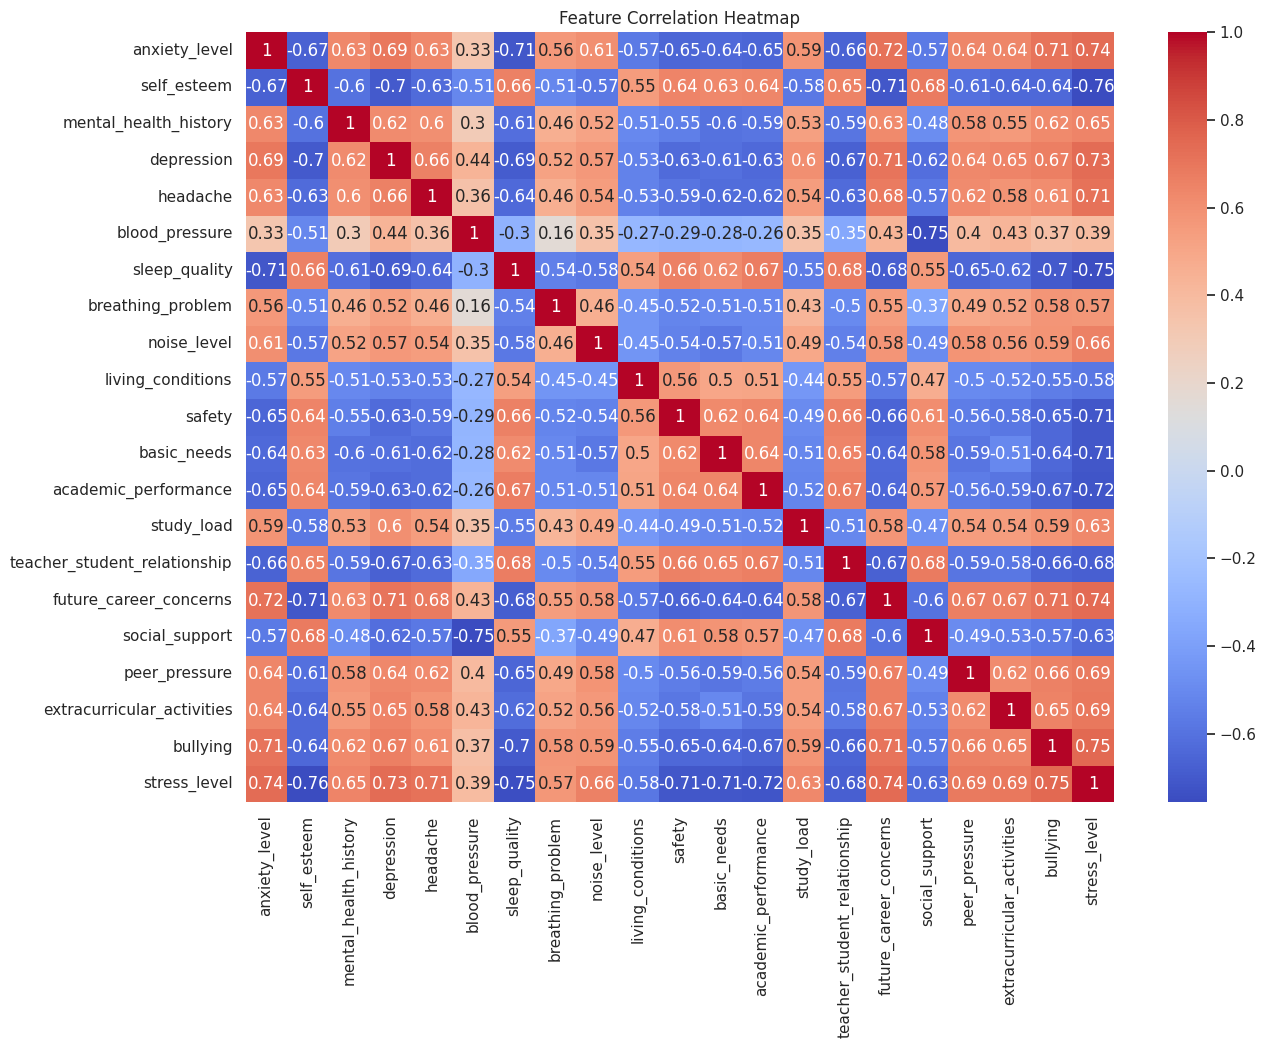

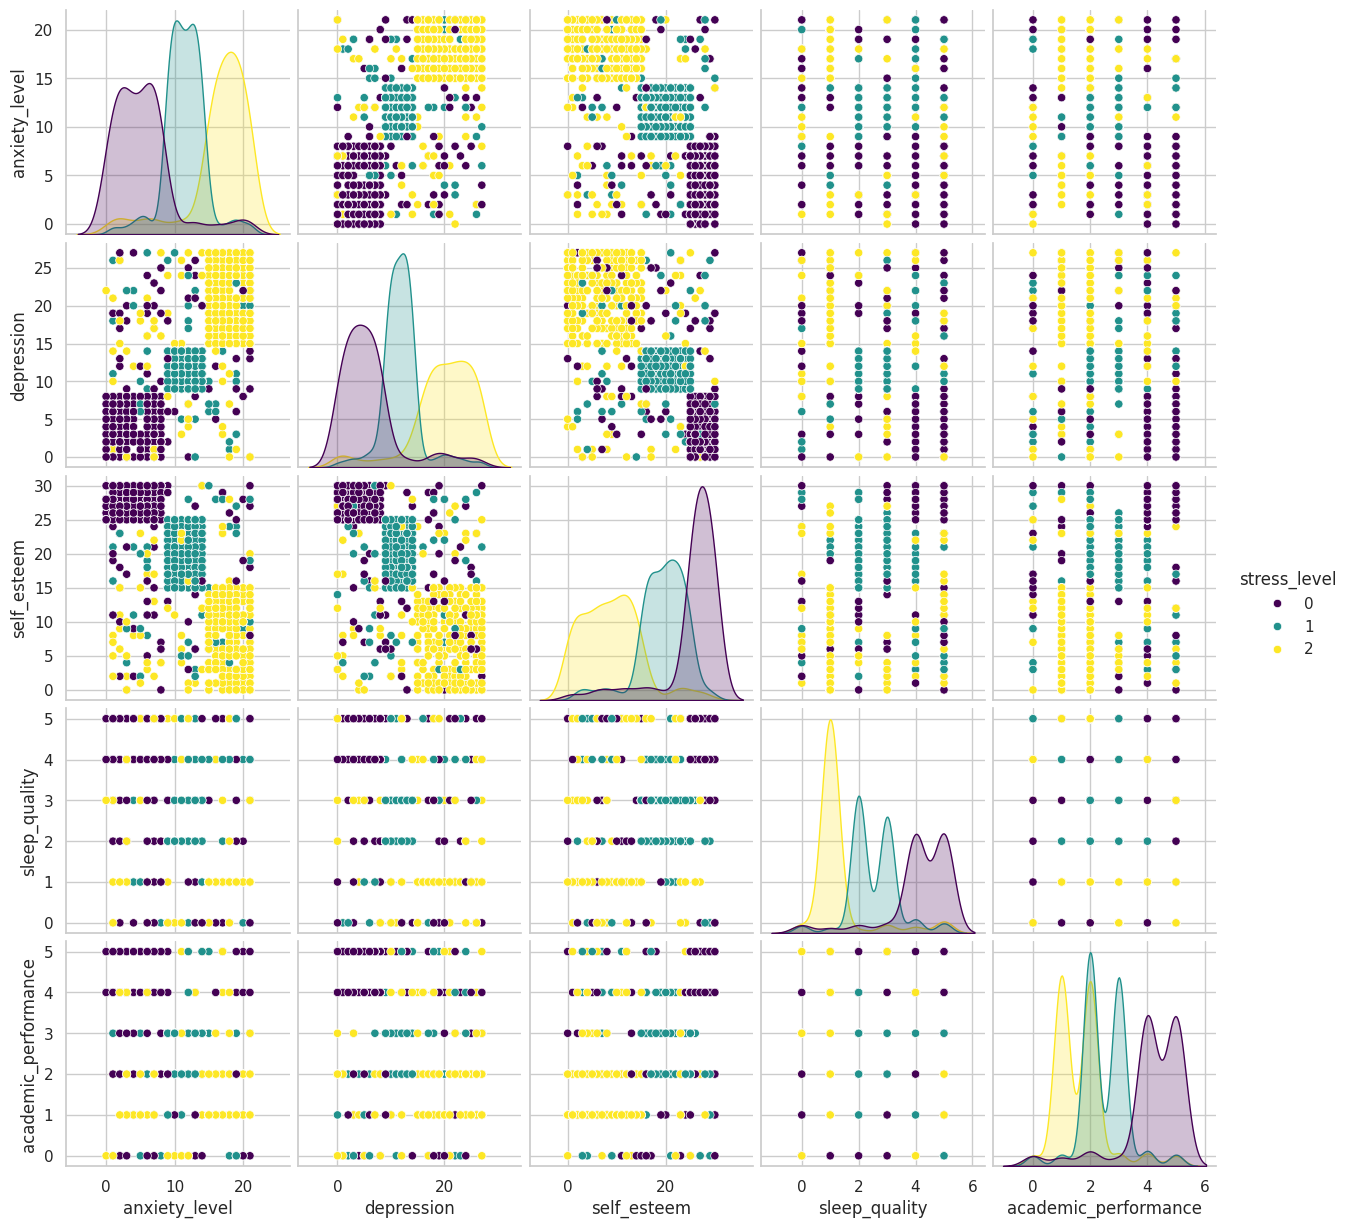

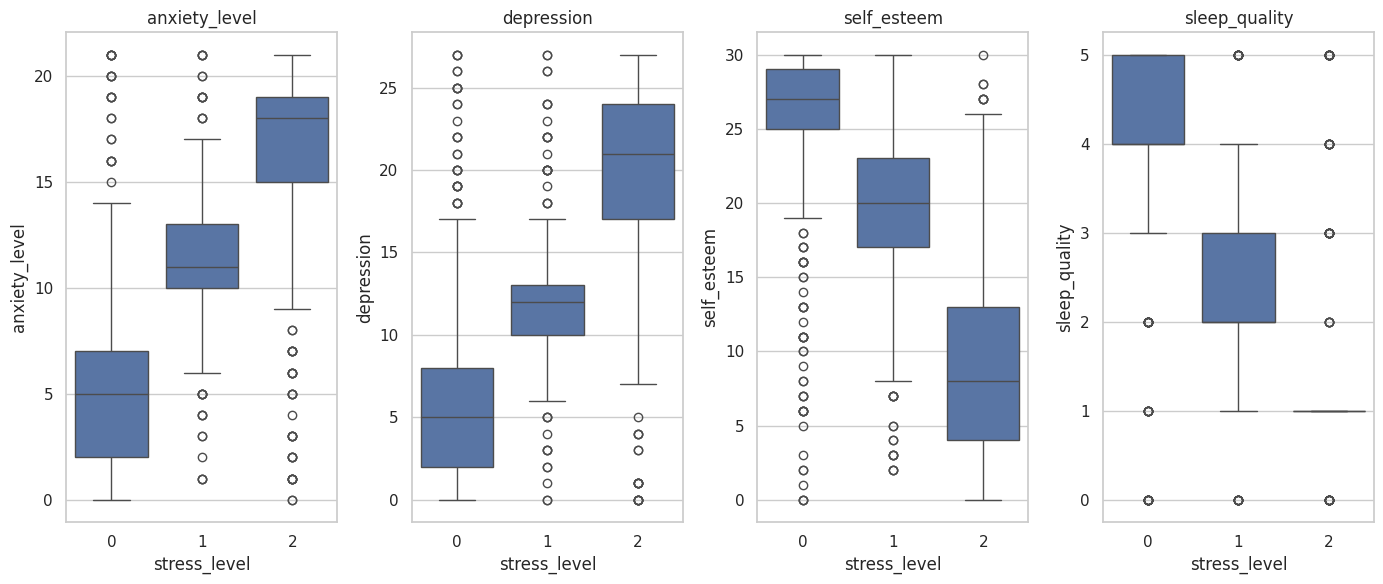

In [ ]:
# 4. EXPLORATORY DATA ANALYSIS (EDA)

# Summary statistics
display(df.describe())

# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='stress_level', data=df, palette='viridis')
plt.title('Stress Level Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot of selected features
selected_features = ['anxiety_level', 'depression', 'self_esteem', 'sleep_quality', 'academic_performance', 'stress_level']
sns.pairplot(df[selected_features], hue='stress_level', palette='viridis')
plt.show()

# Boxplots for key features
plt.figure(figsize=(14,6))
for i, col in enumerate(['anxiety_level', 'depression', 'self_esteem', 'sleep_quality']):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x='stress_level', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

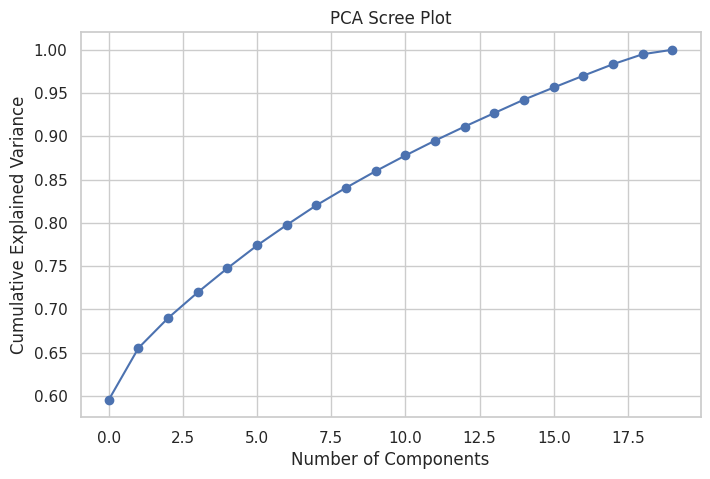

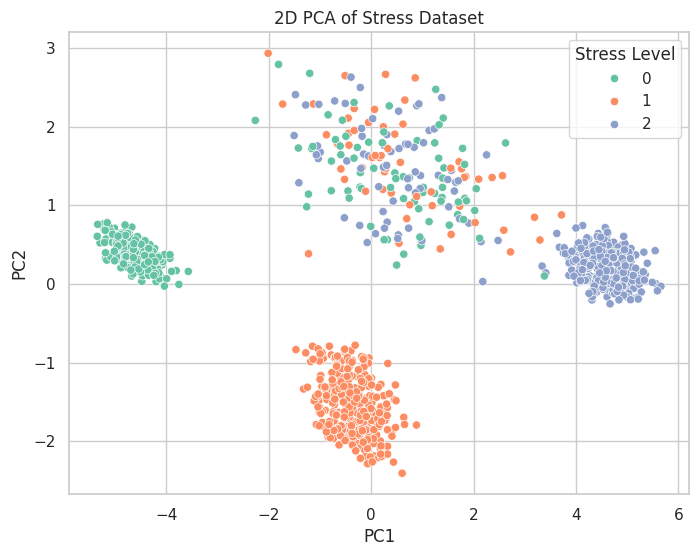

In [ ]:
# 5. DIMENSIONALITY REDUCTION (PCA)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scree plot
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.show()

# PCA scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA of Stress Dataset')
plt.legend(title='Stress Level')
plt.show()

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        71
           1       0.89      0.89      0.89        66
           2       0.88      0.92      0.90        61

    accuracy                           0.90       198
   macro avg       0.90      0.90      0.90       198
weighted avg       0.90      0.90      0.90       198



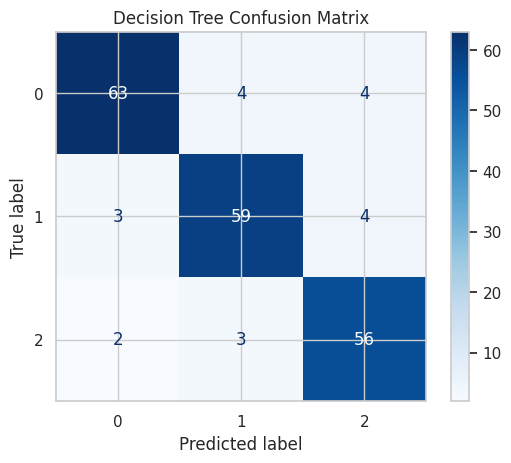

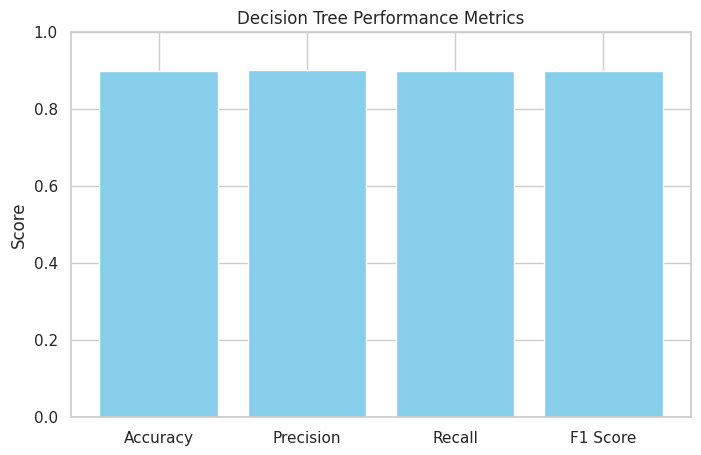

In [ ]:
# 6. MODEL TRAINING & EVALUATION (Main Model: Decision Tree)

from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.18, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluation metrics
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Metric scores
dt_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred, average='weighted')
}

# Plot metrics
plt.figure(figsize=(8,5))
plt.bar(dt_metrics.keys(), dt_metrics.values(), color='skyblue')
plt.ylim(0, 1)
plt.title('Decision Tree Performance Metrics')
plt.ylabel('Score')
plt.grid(True, axis='y')
plt.show()


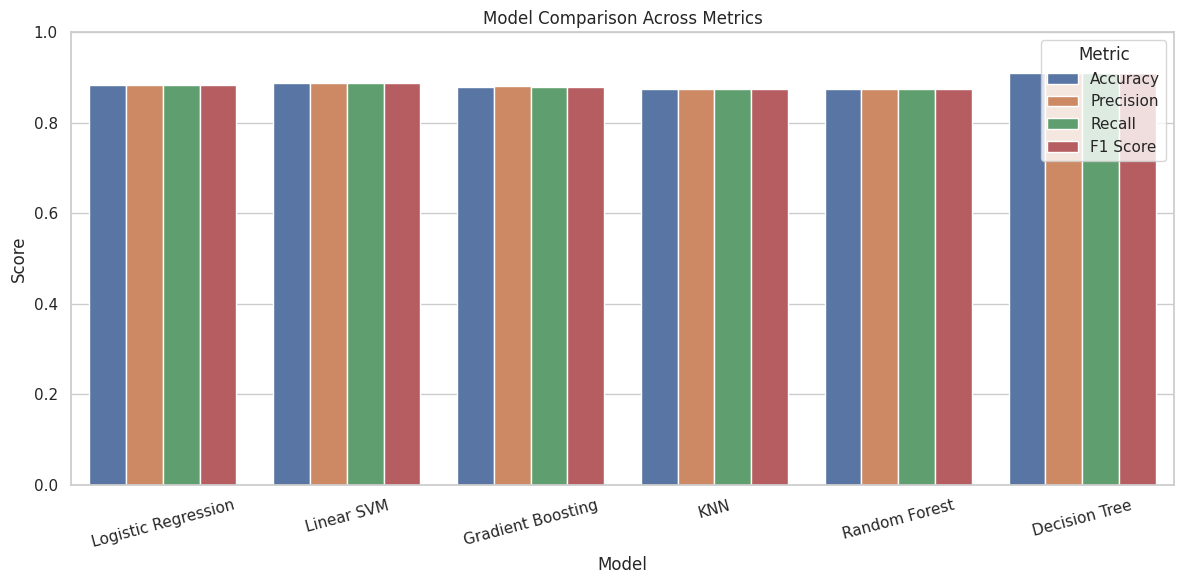

In [ ]:
# 7. COMPARATIVE ANALYSIS WITH OTHER MODELS

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

comparison_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    comparison_results['Model'].append(name)
    comparison_results['Accuracy'].append(accuracy_score(y_test, pred))
    comparison_results['Precision'].append(precision_score(y_test, pred, average='weighted'))
    comparison_results['Recall'].append(recall_score(y_test, pred, average='weighted'))
    comparison_results['F1 Score'].append(f1_score(y_test, pred, average='weighted'))

# Convert to DataFrame
results_df = pd.DataFrame(comparison_results)

# Plot all metrics in a grouped bar chart
results_melted = pd.melt(results_df, id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted)
plt.title('Model Comparison Across Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [ ]:
# 8. CONCLUSION

print("Summary of Best Performing Model:")
display(results_df.sort_values(by='F1 Score', ascending=False).head(1))

Summary of Best Performing Model:


,Model,Accuracy,Precision,Recall,F1 Score
5,Decision Tree,0.909091,0.909857,0.909091,0.909158
